# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.1.0 


**Alunas:**

Gabriela Mitu

Gabriela Cukier

# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240, 320, 3)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240, 320)

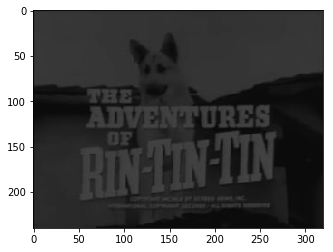

In [6]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

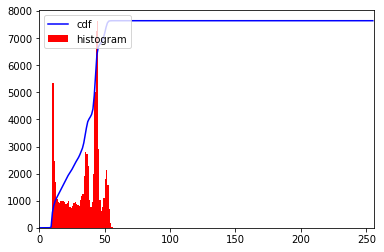

In [7]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

**Resp.:**

Não, pois seus valores no eixo X estão concentradas entre:

In [8]:
smallest = np.amin(rintin_gray)
biggest = np.amax(rintin_gray)

print('Valor minimo: ', smallest)
print('Valor maximo: ', biggest)

Valor minimo:  8
Valor maximo:  58


In [9]:
255/(58-8)

5.1

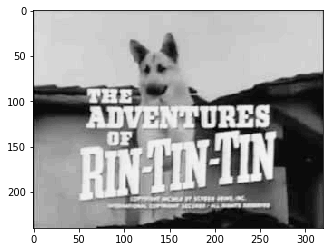

In [10]:
#2)

rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)
for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        rintin_gray[i][j] = (rintin_gray[i][j] - 8)*5.1
        
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

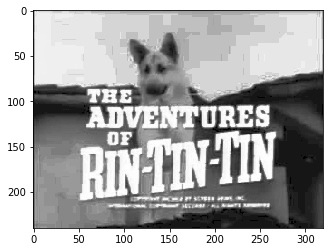

In [11]:
#Outra forma de fazer
rintin_gray = cv2.equalizeHist(rintin_gray)
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

##### Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


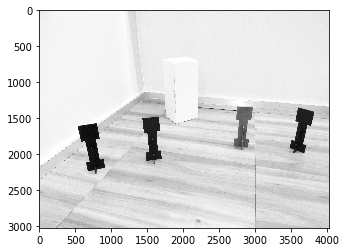

In [12]:
#1)sala_r: usa o canal red (R) 

sala = cv2.imread("cena_canto_sala.jpg")
sala = cv2.cvtColor(sala, cv2.COLOR_BGR2RGB)

sala_r = sala[:,:,0]
plt.imshow(sala_r, cmap="Greys_r", vmin=0, vmax=255)



É possível identificar, porque a caixa vermelha está ressaltado em tons mais para o branco. 

In [13]:
sala.shape

(3024, 4032, 3)

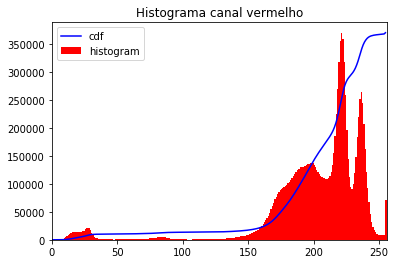

In [33]:
hist,bins = np.histogram(sala_r.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(sala_r.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Histograma canal vermelho")
plt.show()

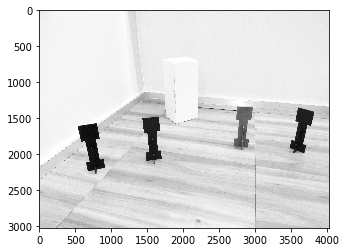

In [30]:
#1) sala_b: usa o canal blue (B)

sala_b = sala[:,:,2]
plt.imshow(sala_b, cmap="Greys_r", vmin=0, vmax=255)



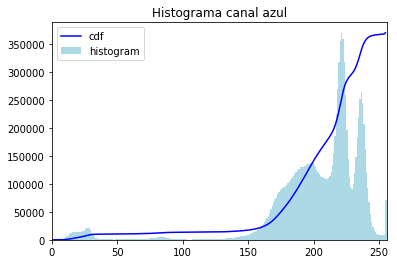

In [32]:
hist,bins = np.histogram(sala_b.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(sala_b.flatten(),256,[0,256], color = 'lightblue')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Histograma canal azul")
plt.show()

 É possível identificar, porque o creeper azul esta ressaltado em tons mais para o branco.

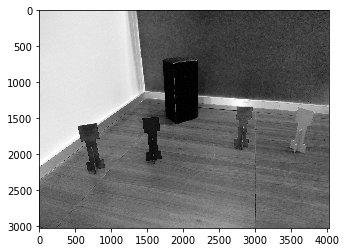

In [17]:
sala_g = sala[:,:,1]
plt.imshow(sala_b, cmap="Greys_r", vmin=0, vmax=255)

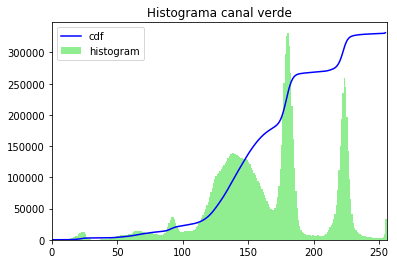

In [34]:
#Histograma utilizando o canal green (G)

hist,bins = np.histogram(sala_g.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(sala_g.flatten(),256,[0,256], color = 'lightgreen')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Histograma canal verde")
plt.show()

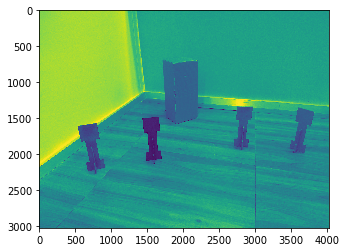

In [19]:
#3) 
imagem_gray = cv2.cvtColor(sala, cv2.COLOR_BGR2GRAY)

saida = imagem_gray.copy()

plt.imshow(imagem_gray)

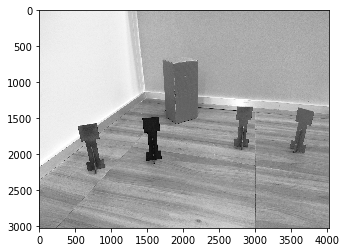

In [20]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

Podemos zerar a imagem para usar como saída

In [21]:
saida[:] = 0

Note que, depois de zerar, vemos a imagem toda como preto

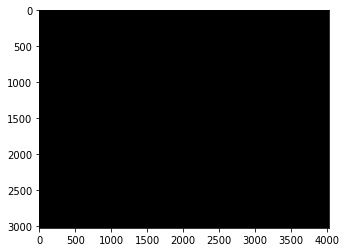

In [22]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

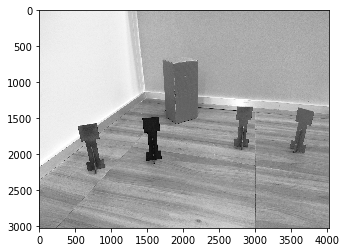

In [23]:
saida = np.zeros((3024, 4032), dtype=np.uint8)


for i in range(imagem_gray.shape[0]):
    for j in range(imagem_gray.shape[1]):
        saida[i][j] = imagem_gray[i][j]

plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

In [24]:
sala = cv2.imread("cena_canto_sala.jpg")

In [25]:
saida = np.zeros((sala.shape[0],sala.shape[1]), dtype=np.uint8)

In [28]:
sala_br = cv2.cvtColor(sala, cv2.COLOR_BGR2RGB)

for i in range(sala_br.shape[0]):
    for j in range(sala_br.shape[1]):
            cor=sala_br[i][j]
            #if cor[0]>=230 and cor[2]<=220 and cor[2]>210 and cor[1]<=220 and cor[1]>200:
            if cor[0]>=200 and cor[2]<25:
                saida[i][j]=255
                    
            else:
                saida[i][j]=0



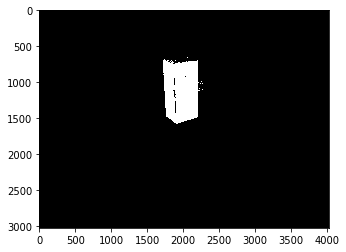

In [29]:
plt.imshow(saida, cmap="Greys_r", vmin=0 , vmax=255)

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

In [109]:
img = cv2.imread("hall_box_battery_atividade3.png")

imagem_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

saida = imagem_gray.copy()



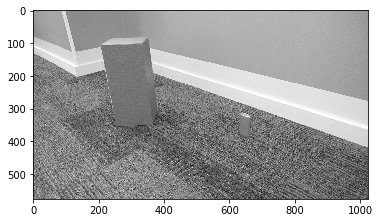

In [110]:
plt.imshow(saida, cmap="Greys_r")#, vmin=0, vmax=255)

In [111]:
#altura e largura da imagem (respectivamente)

saida.shape

(576, 1024)

In [112]:
#saida = np.zeros((576, 1024), dtype=np.uint8)
saida[:] = 0


for i in range(imagem_gray.shape[0]-1):
    for j in range(imagem_gray.shape[1]-1):
        saida[i][j] = abs(int(imagem_gray[i+1][j])-int(imagem_gray[i-1][j]))

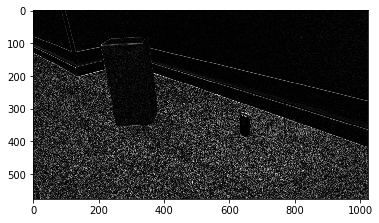

In [113]:
plt.imshow(saida, cmap='Greys_r')